In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns
import pandas as pd
import numpy as np

import csv

import scipy
from scipy import stats




Bad key text.latex.preview in file C:\Users\PeterDell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\PeterDell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\PeterDell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.

In [2]:
slowbegin = 300
fastbegin = 600
numNode=1000

In [3]:
string1='TrueTrueassociative/all_TC_mod_in_True_mod_topTrue_Direct_associative_all_39.npy'
#string1='TrueFalseassociative/all_TC_mod_in_True_mod_topFalse_Direct_associative_all_39.npy'
time_constants_n = np.load(string1) 
foo = np.mean(time_constants_n.T,axis=1)
data_ass=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]

string1='TrueTrueFalse/all_TC_mod_in_True_mod_topTrue_Direct_False_all_39.npy'
#string1='TrueFalseFalse/all_TC_mod_in_True_mod_topFalse_Direct_False_all_39.npy'
time_constants_n = np.load(string1) 
foo = np.mean(time_constants_n.T,axis=1)
data_false=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]

string1='TrueTrueinput_driven/all_TC_mod_in_True_mod_topTrue_Direct_input_driven_all_39.npy'
#string1='TrueFalseinput_driven/all_TC_mod_in_True_mod_topFalse_Direct_input_driven_all_39.npy'
time_constants_n = np.load(string1) 
foo = np.mean(time_constants_n.T,axis=1)
data_indrive=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]

        

Text(0, 0.5, 'Narrative Integration Time Constant')

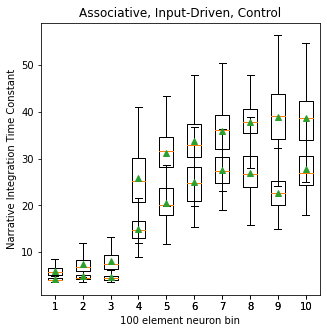

In [4]:
fig= plt.figure(figsize=(5,5))   
plt.title('Associative, Input-Driven, Control')
#plt.ylim(0,75)
#plt.boxplot(dataTFF,showmeans=True)
SE_bool=False
plt.boxplot(data_ass,showmeans=True,showfliers=SE_bool)
plt.boxplot(data_indrive,showmeans=True,showfliers=SE_bool)
#plt.boxplot(data_false,showmeans=True,showfliers=SE_bool)

plt.xlabel("100 element neuron bin")
plt.ylabel("Narrative Integration Time Constant")


#plt.savefig('checking2/integration_time_constants_400_600_800.png')


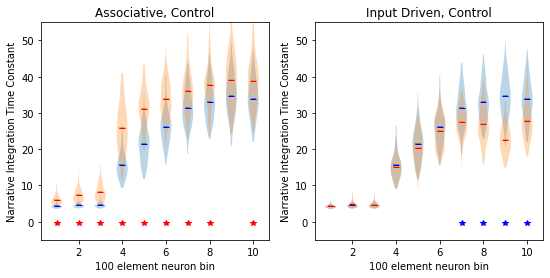

In [5]:
fig= plt.figure(figsize=(9,4))   
plt.subplot(121)
plt.title('Associative, Control')
plt.ylim(-5,55)
#plt.violinplot(dataTFF,showmeans=True)
SE_bool=False
plt.violinplot(data_false,showmeans=True,showextrema=SE_bool)

#plt.violinplot(data_indrive,showmeans=True,showextrema=SE_bool)
plt.violinplot(data_ass,showmeans=True,showextrema=SE_bool)
#plt.violinplot(dataTFF,showmeans=True,showextrema=SE_bool)
plt.xlabel("100 element neuron bin")
plt.ylabel("Narrative Integration Time Constant")

pval = 0.000001
for index in range(0,10):
    t,p = stats.ttest_rel(data_false[index],data_ass[index])
    #t,p = stats.ttest_rel(gaussian_filter1d(group_lesioned[:,i],sigma=filter),gaussian_filter1d(group_standard[:,i],sigma=filter))
    if p<pval:
        if t > 0:
            plt.plot(index+1,-0.5,'b*')
        else:
            plt.plot(index+1,-0.5,'r*')
for i, lists in enumerate(data_false):
    plt.plot(i+1, np.mean(lists),'b_')
for i, lists in enumerate(data_ass):
    plt.plot(i+1, np.mean(lists),'r_')

plt.subplot(122)
plt.title('Input Driven, Control')
plt.ylim(-5,55)
#plt.violinplot(dataTFF,showmeans=True)

plt.violinplot(data_false,showmeans=True,showextrema=SE_bool)

plt.violinplot(data_indrive,showmeans=True,showextrema=SE_bool)
#plt.violinplot(data_ass,showmeans=True,showextrema=SE_bool)
#plt.violinplot(dataTFF,showmeans=True,showextrema=SE_bool)
plt.xlabel("100 element neuron bin")
plt.ylabel("Narrative Integration Time Constant")


for index in range(0,10):
    t,p = stats.ttest_rel(data_false[index],data_indrive[index])
    #t,p = stats.ttest_rel(gaussian_filter1d(group_lesioned[:,i],sigma=filter),gaussian_filter1d(group_standard[:,i],sigma=filter))
    if p<pval:
        if t > 0:
            plt.plot(index+1,-0.5,'b*')
        else:
            plt.plot(index+1,-0.5,'r*')
for i, lists in enumerate(data_false):
    plt.plot(i+1, np.mean(lists),'b_')
for i, lists in enumerate(data_indrive):
    plt.plot(i+1, np.mean(lists),'r_')
plt.show()
#plt.savefig('checking2/integration_time_constants_400_600_800.png')


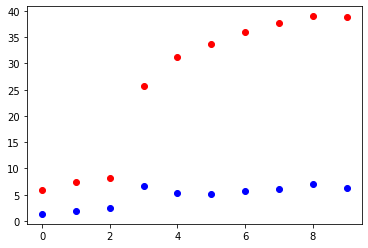

In [6]:
for i, lists in enumerate(data_ass):
    plt.plot(i, np.mean(lists),'ro')
    plt.plot(i, np.std(lists),'bo')
plt.show()

In [7]:
x_range=np.zeros(10)
ass_means =np.zeros(10)
ass_stds =np.zeros(10)
for i, lists in enumerate(data_ass):
    #print(i, np.mean(lists))
    ass_means[i] = np.mean(lists)
    ass_stds[i] = np.std(lists)
    x_range[i] = i

In [8]:
false_means =np.zeros(10)
false_stds =np.zeros(10)
for i, lists in enumerate(data_false):
    #print(i, np.mean(lists))
    false_means[i] = np.mean(lists)
    false_stds[i] = np.std(lists)
    x_range[i] = i

In [9]:
indrive_means =np.zeros(10)
indrive_stds =np.zeros(10)
for i, lists in enumerate(data_indrive):
    #print(i, np.mean(lists))
    indrive_means[i] = np.mean(lists)
    indrive_stds[i] = np.std(lists)
    x_range[i] = i

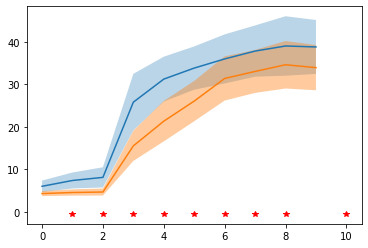

In [10]:
plt.plot(x_range,ass_means)
plt.fill_between(x_range, ass_means+ass_stds, ass_means-ass_stds,alpha=0.3)
plt.plot(x_range,false_means)
plt.fill_between(x_range, false_means+false_stds, false_means-false_stds,alpha=0.4)
pval = 0.000001
for index in range(0,10):
    t,p = stats.ttest_rel(data_false[index],data_ass[index])
    #t,p = stats.ttest_rel(gaussian_filter1d(group_lesioned[:,i],sigma=filter),gaussian_filter1d(group_standard[:,i],sigma=filter))
    if p<pval:
        if t > 0:
            plt.plot(index+1,-0.5,'b*')
        else:
            plt.plot(index+1,-0.5,'r*')


plt.show()


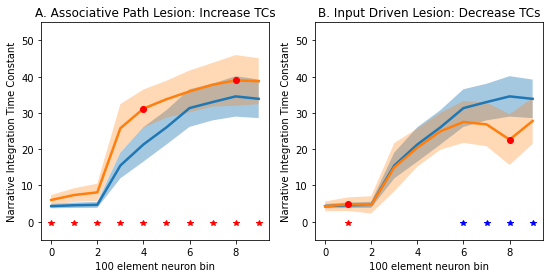

In [11]:
fig= plt.figure(figsize=(9,4))   
plt.subplot(121)
plt.title('A. Associative Path Lesion: Increase TCs')
plt.ylim(-5,55)

plt.plot(x_range,false_means,linewidth=2.5)
plt.fill_between(x_range, false_means+false_stds, false_means-false_stds,alpha=0.4)
plt.plot(x_range,ass_means,linewidth=2.5)
plt.fill_between(x_range, ass_means+ass_stds, ass_means-ass_stds,alpha=0.3)



plt.xlabel("100 element neuron bin")
plt.ylabel("Narrative Integration Time Constant")

pval = 0.01
for index in range(0,10):
    t,p = stats.ttest_rel(data_false[index],data_ass[index])
    #t,p = stats.ttest_rel(gaussian_filter1d(group_lesioned[:,i],sigma=filter),gaussian_filter1d(group_standard[:,i],sigma=filter))
    if p<pval:
        if t > 0:
            plt.plot(index,-0.5,'b*')
        else:
            plt.plot(index,-0.5,'r*')
#for i, lists in enumerate(data_false):
#    plt.plot(i, np.mean(lists),'b_')
#for i, lists in enumerate(data_ass):
#    plt.plot(i, np.mean(lists),'r_')

#mark the spot
index=4
plt.plot(index, np.mean(data_ass[index]),'ro')
index=8
plt.plot(index, np.mean(data_ass[index]),'ro')

plt.subplot(122)
plt.title('B. Input Driven Lesion: Decrease TCs')
plt.ylim(-5,55)
#plt.violinplot(dataTFF,showmeans=True)

plt.plot(x_range,false_means,linewidth=2.5)
plt.fill_between(x_range, false_means+false_stds, false_means-false_stds,alpha=0.4)
plt.plot(x_range,indrive_means,linewidth=2.5)
plt.fill_between(x_range, indrive_means+ass_stds, indrive_means-ass_stds,alpha=0.3)


plt.xlabel("100 element neuron bin")
plt.ylabel("Narrative Integration Time Constant")


for index in range(0,10):
    t,p = stats.ttest_rel(data_false[index],data_indrive[index])
    #t,p = stats.ttest_rel(gaussian_filter1d(group_lesioned[:,i],sigma=filter),gaussian_filter1d(group_standard[:,i],sigma=filter))
    if p<pval:
        if t > 0:
            plt.plot(index,-0.5,'b*')
        else:
            plt.plot(index,-0.5,'r*')
#for i, lists in enumerate(data_false):
#    plt.plot(i, np.mean(lists),'b_')
#for i, lists in enumerate(data_indrive):
#    plt.plot(i, np.mean(lists),'r_')

#mark the spot
index=8
plt.plot(index, np.mean(data_indrive[index]),'ro')
index=1
plt.plot(index, np.mean(data_indrive[index]),'ro')

#plt.savefig('indrive_assoc_path_lesions_simulation.png',dpi=300)


In [12]:
for index in range(0,10):
    low=index*100
    high = low+99
    print(index, stats.ttest_rel(data_indrive[index],data_ass[index]))

0 Ttest_relResult(statistic=-13.507296253951987, pvalue=4.184637543025488e-24)
1 Ttest_relResult(statistic=-12.435849158181039, pvalue=7.172917146697688e-22)
2 Ttest_relResult(statistic=-14.367694854737708, pvalue=7.356730111056729e-26)
3 Ttest_relResult(statistic=-16.2708714556901, pvalue=1.3238548752014385e-29)
4 Ttest_relResult(statistic=-16.54321311755606, pvalue=3.999893043654559e-30)
5 Ttest_relResult(statistic=-13.439602240064097, pvalue=5.7712343767084746e-24)
6 Ttest_relResult(statistic=-13.31193922452018, pvalue=1.0596080198720053e-23)
7 Ttest_relResult(statistic=-13.396410901834598, pvalue=7.08694021344936e-24)
8 Ttest_relResult(statistic=-20.88288368374064, pvalue=7.328997155075253e-38)
9 Ttest_relResult(statistic=-13.287380401150273, pvalue=1.1912280772580679e-23)


In [13]:
foo = np.mean(time_constants_n.T,axis=1)

data=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]
#plt.boxplot(data, nofliers=False,whis=[20, 50],nomeans=True)
plt.boxplot(data, nofliers=False,nomeans=True)
plt.title(string1)
#plt.ylim(0,75)
#plt.tight_layout()
#plt.savefig('checking2/integration_time_constants_classic_sorted.png')


TypeError: boxplot() got an unexpected keyword argument 'nofliers'

In [ ]:
foo.shape

In [ ]:
plt.plot(check[:800])

plt.show()

In [ ]:
string1="comparison/FalseFalseFalse/all_TC_mod_in_False_mod_topFalse_Direct_False_all_39.npy"

check_FFF = np.load(string1) 
foo = np.mean(check_FFF.T,axis=1)

dataFFF=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899]]#,foo[901:999]]
dataFFF=[foo[0:143],foo[143:286],foo[286:429],foo[429:572],foo[572:715],foo[715:858],foo[858:1000]]
#plt.boxplot(data, showfliers=False,whis=[20, 50],showmeans=True)
plt.boxplot(dataFFF, showfliers=False,showmeans=True)
plt.title(string1)
plt.ylim(0,70)
plt.show()
print(check_FFF.shape)

In [ ]:
string1="comparison/FalseFalseFalse/all_TC_mod_in_False_mod_topFalse_Direct_False_all_39.npy"

check_FFF = np.load(string1) 
for i in range(40):
    check_FFF[i] = np.sort(check_FFF[i])

In [ ]:
foo = np.mean(check_FFF.T,axis=1)

data_FFFsorted=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]
#plt.boxplot(data, showfliers=False,whis=[20, 50],showmeans=True)
suffix = ' sorted'
string1 += suffix
plt.title(string1)
plt.ylim(-2,55)
plt.boxplot(data_FFFsorted, showfliers=False,showmeans=True)
plt.savefig('checking2/integration_time_constants_FFF_sorted.png')

In [ ]:
for i in range(1,8):
    print(143*i)

In [ ]:
string1="comparison/TrueTrueFalse/all_TC_mod_in_True_mod_topTrue_Direct_False_all_39.npy"

check_TTF = np.load(string1) 
foo = np.mean(check_TTF.T,axis=1)

dataTTF=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]
dataTTF=[foo[0:143],foo[143:286],foo[286:429],foo[429:572],foo[572:715],foo[715:858],foo[858:1000]]
#plt.boxplot(data, showfliers=False,whis=[20, 50],showmeans=True)
plt.title(string1)
plt.ylim(0,70)
plt.boxplot(dataTTF, showfliers=False,showmeans=True)
plt.show()

In [ ]:
string1="comparisonEDR/TrueTrue400/all_TC_mod_in_True_mod_topTrue_breadth_400_39.npy"

check_TTF = np.load(string1) 
foo = np.mean(check_TTF.T,axis=1)

dataTT400=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]
dataTT400=[foo[0:143],foo[143:286],foo[286:429],foo[429:572],foo[572:715],foo[715:858],foo[858:1000]]
#plt.boxplot(data, showfliers=False,whis=[20, 50],showmeans=True)
plt.title(string1)
#plt.ylim(0,75)
plt.violinplot(dataTT400, showmeans=True,showextrema=False)
#plt.boxplot(dataTT400, showmeans=True)
plt.show()

In [ ]:
string1="comparisonEDR/TrueTrue800/all_TC_mod_in_True_mod_topTrue_breadth_800_39.npy"

check_TTF = np.load(string1) 
foo = np.mean(check_TTF.T,axis=1)

dataTT800=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]
dataTT800=[foo[0:143],foo[143:286],foo[286:429],foo[429:572],foo[572:715],foo[715:858],foo[858:1000]]
#plt.boxplot(data, showfliers=False,whis=[20, 50],showmeans=True)
#fig= plt.figure(figsize=(8,4))    
plt.title(string1)
plt.ylim(0,75)
plt.boxplot(dataTT800, showfliers=False,showmeans=True)
plt.show()

In [ ]:
string1="comparison/TrueFalseFalse/all_TC_mod_in_True_mod_topFalse_Direct_False_all_39.npy"

check_TTF = np.load(string1) 
foo = np.mean(check_TTF.T,axis=1)

dataTFF=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]
dataTFF=[foo[0:143],foo[143:286],foo[286:429],foo[429:572],foo[572:715],foo[715:858],foo[858:1000]]
#plt.boxplot(data, showfliers=False,whis=[20, 50],showmeans=True)
plt.title(string1)
plt.ylim(0,75)
plt.boxplot(dataTFF, showfliers=False,showmeans=True)
plt.show()

In [ ]:
string1="comparisonEDR/TrueTrue800/all_TC_mod_in_True_mod_topTrue_breadth_800_39.npy"

check_TTF = np.load(string1) 
foo = np.mean(check_TTF.T,axis=1)
fig= plt.figure(figsize=(8,4))
data=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899]]#,foo[901:999]]
#plt.boxplot(data, showfliers=False,whis=[20, 50],showmeans=True)
#fig= plt.figure(figsize=(8,4))    
plt.title(string1)
#plt.ylim(0,75)
plt.boxplot(dataTFF,showmeans=True, showfliers=False)
plt.boxplot(dataTTF,showmeans=True, showfliers=False)

plt.boxplot(dataTT400,showmeans=True, showfliers=False)
plt.boxplot(dataTT800,showmeans=True, showfliers=False)


plt.show()

In [ ]:
string1="comparison/FalseTrueFalse/all_TC_mod_in_False_mod_topTrue_Direct_False_all_39.npy"

check = np.load(string1) 
foo = np.mean(check.T,axis=1)

data=[foo[0:99],foo[100:199],foo[200:299],foo[300:399],foo[400:499],foo[500:599],foo[600:699],foo[700:799],foo[800:899],foo[900:999]]
#plt.boxplot(data, showfliers=False,whis=[20, 50],showmeans=True)
plt.title(string1)
#plt.ylim(0,20)
plt.boxplot(data, showfliers=False,showmeans=True)
plt.show()

In [ ]:
dataTTF.shape

In [ ]:

plt.boxplot(dataTTF[3:10], showfliers=False)
plt.show()

In [ ]:
seed=99
fig= plt.figure(figsize=(15,12))    
fig.suptitle(string1, fontsize=16)

plt.subplot(221)
timebegin=1500
timeend=2200
resbegin = 200
resend = 299
begin=0
end=1000
plt.title('%s' % resbegin, fontsize=16)
sns.heatmap(np.corrcoef(check[timebegin:timeend,resbegin:resend]),  cmap='viridis')

plt.subplot(222)
resbegin = 700
resend = 799
begin=0
end=1000
plt.title('%s' % resbegin, fontsize=16)
sns.heatmap(np.corrcoef(check[timebegin:timeend,resbegin:resend]),  cmap='viridis')

plt.subplot(223)
timebegin=1500
timeend=2200
resbegin = 200
resend = 205
begin=0
end=1000
plt.title('%s' % resbegin, fontsize=16)
plt.plot(check_raw[timebegin:timeend,resbegin:resend])

plt.subplot(224)
resbegin = 700
resend = 705
begin=0
end=1000
plt.title('%s' % resbegin, fontsize=16)
plt.plot(check_raw[timebegin:timeend,resbegin:resend])
plt.savefig('checking2/checking_sorted_%s.png' % seed)

fig= plt.figure(figsize=(15,12))    
fig.suptitle(string2, fontsize=16)

plt.subplot(221)
timebegin=1500
timeend=2200
resbegin = 200
resend = 299
begin=0
end=1000
plt.title('%s' % resbegin, fontsize=16)
sns.heatmap(np.corrcoef(check2[timebegin:timeend,resbegin:resend]),  cmap='viridis')

plt.subplot(222)
resbegin = 700
resend = 799
begin=0
end=1000
plt.title('%s' % resbegin, fontsize=16)
sns.heatmap(np.corrcoef(check2[timebegin:timeend,resbegin:resend]),  cmap='viridis')

plt.subplot(223)
timebegin=1500
timeend=2200
resbegin = 200
resend = 205
begin=0
end=1000
plt.title('%s' % resbegin, fontsize=16)
plt.plot(check2_raw[timebegin:timeend,resbegin:resend])

plt.subplot(224)
resbegin = 700
resend = 705
begin=0
end=1000
plt.title('%s' % resbegin, fontsize=16)
plt.plot(check2_raw[timebegin:timeend,resbegin:resend])


plt.savefig('checking2/checking_EDR_%s.png' % seed)
plt.close('all')


In [ ]:
foo

In [ ]:
post_norm = False
if post_norm:
    print("doing post norm")
    for j in range(check_sum.shape[1]):
        mean = check_sum[:,j].mean()
        if abs(mean) > 0.1:
            check_sum[:,j] = check_sum[:,j]/mean
        else:
            check_sum[:,j] = check_sum[:,j]     
    for j in range(check2_sum.shape[1]):
        mean = check2_sum[:,j].mean()
        if abs(mean) > 0.1:
            check2_sum[:,j] = check2_sum[:,j]/mean
        else:
            check2_sum[:,j] = check2_sum[:,j]      

In [ ]:
#just get the sum of all the states
for seed in range(40):
  
    string1='results_w_stops_check/data/sherlock-Sorted_states_seed%s.npy' % seed
    string2='comparison/TrueTrueFalse/mod_in_True_mod_topTrue_Direct_False_%s.npy' % seed
    check = np.load(string1) 
    check2 = np.load(string2) 
    check_raw = np.load(string1) 
    check2_raw = np.load(string2) 

    normalize_en_route = False
    if normalize_en_route:    
        for j in range(check.shape[1]):
            mean = check[:,j].mean()
            if abs(mean) > 0.01:
                check[:,j] = check[:,j]/mean
            else:
                check[:,j] = check[:,j]     
        for j in range(check2.shape[1]):
            mean = check2[:,j].mean()
            if abs(mean) > 0.01:
                check2[:,j] = check2[:,j]/mean
            else:
                check2[:,j] = check2[:,j]         
    
    
    if seed == 0:
        check_sum = check
        check2_sum = check2
        check_raw_sum =  check_raw
        check2_raw_sum =  check2_raw
    else:
        check_sum = check_sum + check
        check2_sum = check2 + check2_sum
        check_raw_sum =  check_raw + check_raw_sum
        check2_raw_sum =  check2_raw + check2_raw_sum


In [ ]:
fig= plt.figure(figsize=(15,12))    
fig.suptitle("Normalized Average of 40 Sorted States", fontsize=16)

plt.subplot(221)
timebegin=0
timeend=2682
resbegin = slowbegin
resend = slowbegin+99
plt.title('%s' % resbegin, fontsize=16)
sns.heatmap(np.corrcoef(check_sum[timebegin:timeend,resbegin:resend]),  cmap='viridis')

plt.subplot(222)
resbegin = fastbegin
resend = fastbegin+99
plt.title('%s' % resbegin, fontsize=16)
sns.heatmap(np.corrcoef(check_sum[timebegin:timeend,resbegin:resend]),  cmap='viridis')

plt.subplot(223)
resbegin = slowbegin
resend = slowbegin+5
plt.title('%s' % resbegin, fontsize=16)
plt.plot(check_raw_sum[timebegin:timeend,resbegin:resend])

plt.subplot(224)
resbegin = fastbegin
resend = fastbegin+5
plt.title('%s' % resbegin, fontsize=16)
plt.plot(check_raw_sum[timebegin:timeend,resbegin:resend])
plt.savefig('checking2/checking_sorted_sum_%s.png' % seed)

fig= plt.figure(figsize=(15,12))    
fig.suptitle("Normalized Average of 40 EDR States", fontsize=16)

plt.subplot(221)
resbegin = slowbegin
resend = slowbegin+99
plt.title('%s' % resbegin, fontsize=16)
sns.heatmap(np.corrcoef(check2_sum[timebegin:timeend,resbegin:resend]),  cmap='viridis')

plt.subplot(222)
resbegin = fastbegin
resend = fastbegin+99
plt.title('%s' % resbegin, fontsize=16)
sns.heatmap(np.corrcoef(check2_sum[timebegin:timeend,resbegin:resend]),  cmap='viridis')

plt.subplot(223)
resbegin = slowbegin
resend = slowbegin+5
plt.title('%s' % resbegin, fontsize=16)
plt.plot(check2_raw_sum[timebegin:timeend,resbegin:resend])

plt.subplot(224)
resbegin = fastbegin
resend = fastbegin+5
plt.title('%s' % resbegin, fontsize=16)
plt.plot(check2_raw_sum[timebegin:timeend,resbegin:resend])

#plt.savefig('checking2/checking_EDR_sum_%s.png' % seed)
